In [1]:
import torch
import pandas as pd
import numpy as np
import os
import pandas as pd
from torch_geometric.data import Data
from torch_geometric.utils.convert import to_networkx
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
def load_df(path):
    # Read the text file line by line
    lines = []
    with open(path, "r") as file:
        lines = file.readlines()

    # Prepare an empty DataFrame with 10 columns
    df = pd.DataFrame(columns=['Video ID', 'uploader', 'age', 'category', 'length', 'views', 'rate', 'ratings', 'comments', 'related IDs'])

    # Iterate over the lines and populate the DataFrame
    for line in lines:
        # Split the line by tabs
        values = line.strip().split("\t")

        start = values[:9]
        end = values[9:]
        start.append(end)
        try:
            df.loc[len(df)] = start
        except:
            print(f"Error for row: {start}")
            
    return df

In [3]:
data_dir = "C:\\Users\\ANDRE\\OneDrive\\Desktop\\Andreas_Sideras\\Demokritos\\Msc in AI\\2nd Semester\\Applications of AI\\0518"
path = os.path.join(data_dir, "0.txt")
df_0 = load_df(path)
path = os.path.join(data_dir, "1.txt")
df_1 = load_df(path)
path = os.path.join(data_dir, "2.txt")
df_2 = load_df(path)
# path = os.path.join(data_dir, "3.txt")
# df_3 = load_df(path)

Error for row: ['4g-YfDYA_Hs', []]
Error for row: ['ot8V22Ozq_0', []]
Error for row: ['h0V15unrf7A', []]
Error for row: ['ACGEZu8m-ok', []]
Error for row: ['MP4x8ieq07I', []]
Error for row: ['DhyutraSA9s', []]
Error for row: ['PdDGGsbtdig', []]
Error for row: ['4CFowiljIPE', []]
Error for row: ['8alP29YLBvI', []]
Error for row: ['pGglsVoBkz0', []]
Error for row: ['Wi52ymTl0eI', []]
Error for row: ['HdjDCv2oUvg', []]
Error for row: ['9eVYzjNACio', []]
Error for row: ['7Eq1Os-iOYA', []]
Error for row: ['LHuIx0pqzVI', []]
Error for row: ['m0QGxTzfqFA', []]
Error for row: ['FmPMx3T5WRw', []]
Error for row: ['Ww8T1O1gv5E', []]
Error for row: ['Bt9xNOyi6Fg', []]
Error for row: ['c7map3zDxMM', []]
Error for row: ['djD7PuSaJ4I', []]
Error for row: ['ZzdukRdsCgw', []]
Error for row: ['qBGu9XjtugU', []]
Error for row: ['V6IGWM5fe8w', []]
Error for row: ['QziHS1jvPYY', []]
Error for row: ['bcqMgT19DyU', []]
Error for row: ['xHnnpADWccA', []]
Error for row: ['OIxdQ-ccjEE', []]
Error for row: ['i-d

In [4]:
data = pd.concat([df_0, df_1,df_2])
data = data.reset_index(drop=True)

In [5]:
data

,Video ID,uploader,age,category,length,views,rate,ratings,comments,related IDs
0,D6frFp-VwHs,yetube,821,Entertainment,30,554455,3.54,2813,422,"[6t8HbzleQqE, dmfq_g3sQHE, D6frFp-VwHs, uc3Z72..."
1,0Lg4i2C6zws,TNAwrestling,821,Sports,573,191461,4.46,217,111,"[YRiXuRIDFzY, gUzkrbr_KP0, PsXfjt3wRLU, Iid3aF..."
2,UJpgxqYGws4,jrc0803,820,Sports,55,160852,4.09,486,423,"[3KtB_SAOuM4, i65LHf0A0aE, PKPDH2a82dA, vhRFLt..."
3,BAPwg5nCKxE,milanoss,820,Film & Animation,578,170536,4.06,82,91,"[QOZSRDYm1SY, UbhEunreGwQ, 6OHhe522B1Y, 9sc4as..."
4,vVJ06ixj19Q,PimpimusPrime,820,Film & Animation,29,95950,4.61,134,185,"[eH7D7Y0cttY, C4vPhkv1wRE, euZcw5OaouE, 9MVXhP..."
...,...,...,...,...,...,...,...,...,...,...
9075,jJegAHMIsf4,alertgoo,787,News & Politics,163,700,4.2,5,0,"[u70TErl9EW0, bqgDlv0QXbs, F9S8EM37Fo4, DQRVFI..."
9076,TOwAygRwJFs,telo003,629,Music,254,1005,4.5,2,1,"[a-gCCDkCfFs, UiKAO262e6g, 1K_3Ey1ANLQ, GYfaaf..."
9077,DrPbTvUDhPg,tripodfilmsllc,475,Comedy,577,595,4.33,3,1,"[Qo1gUoA6p1U, b2f4heaG288, IUL61LYOUiA, RdIjU5..."
9078,fCFD-GfvK7Q,ivisonrj,576,People & Blogs,36,3094,4.2,5,26,"[6w7k1jEAKiM, G_tF10OCYbM, EVywb0_E1ME, MwVK_m..."


In [6]:
category_mapping = {
    'Entertainment'    :0,
    'Sports'           :1,
    'Film & Animation' :2,
    'News & Politics'  :3,
    'Autos & Vehicles' :4,
    'Music'            :5,
    'People & Blogs'   :6,
    ' UNA '            :7,
    'Comedy'           :8,
    'Gadgets & Games'  :9,
    'Pets & Animals'   :10,
    'Howto & DIY'      :11,
    'Travel & Places'  :12
}

data['category'] = data['category'].map(category_mapping)

In [7]:
data.head(5)

,Video ID,uploader,age,category,length,views,rate,ratings,comments,related IDs
0,D6frFp-VwHs,yetube,821,0,30,554455,3.54,2813,422,"[6t8HbzleQqE, dmfq_g3sQHE, D6frFp-VwHs, uc3Z72..."
1,0Lg4i2C6zws,TNAwrestling,821,1,573,191461,4.46,217,111,"[YRiXuRIDFzY, gUzkrbr_KP0, PsXfjt3wRLU, Iid3aF..."
2,UJpgxqYGws4,jrc0803,820,1,55,160852,4.09,486,423,"[3KtB_SAOuM4, i65LHf0A0aE, PKPDH2a82dA, vhRFLt..."
3,BAPwg5nCKxE,milanoss,820,2,578,170536,4.06,82,91,"[QOZSRDYm1SY, UbhEunreGwQ, 6OHhe522B1Y, 9sc4as..."
4,vVJ06ixj19Q,PimpimusPrime,820,2,29,95950,4.61,134,185,"[eH7D7Y0cttY, C4vPhkv1wRE, euZcw5OaouE, 9MVXhP..."


In [8]:
node_IDs = set(data['Video ID'].unique())

#drop the links that link to nodes that I do not have info about
data['related IDs'] = data['related IDs'].apply(lambda x: [item for item in x if item in node_IDs] )

In [9]:
data

,Video ID,uploader,age,category,length,views,rate,ratings,comments,related IDs
0,D6frFp-VwHs,yetube,821,0,30,554455,3.54,2813,422,"[6t8HbzleQqE, dmfq_g3sQHE, D6frFp-VwHs, uc3Z72..."
1,0Lg4i2C6zws,TNAwrestling,821,1,573,191461,4.46,217,111,"[9waJ0vOtpsY, x9CMW1URsEo, PiGDwZPgRLM]"
2,UJpgxqYGws4,jrc0803,820,1,55,160852,4.09,486,423,"[3KtB_SAOuM4, i65LHf0A0aE, PKPDH2a82dA, vhRFLt..."
3,BAPwg5nCKxE,milanoss,820,2,578,170536,4.06,82,91,"[UbhEunreGwQ, 6OHhe522B1Y, 9sc4asoixhk, swttQ7..."
4,vVJ06ixj19Q,PimpimusPrime,820,2,29,95950,4.61,134,185,"[F5qsdZFcrKM, vJNrJX4ysmA, 4eaDX8tzqj4, fdAF1c..."
...,...,...,...,...,...,...,...,...,...,...
9075,jJegAHMIsf4,alertgoo,787,3,163,700,4.2,5,0,[]
9076,TOwAygRwJFs,telo003,629,5,254,1005,4.5,2,1,[R9oSd_d3KZU]
9077,DrPbTvUDhPg,tripodfilmsllc,475,8,577,595,4.33,3,1,[]
9078,fCFD-GfvK7Q,ivisonrj,576,6,36,3094,4.2,5,26,[]


In [10]:
#find disconnected nodes and remove them
leafes = data[data['related IDs'].apply(len) == 0]
leafes_ids = set(leafes['Video ID'])
for _, ids in data['related IDs'].items():
    for node in ids:
        if node in leafes_ids:
            leafes_ids.remove(node)
print(f'I found {len(leafes_ids)} disconnected nodes')
graph = data[~data['Video ID'].isin(leafes_ids)]
graph = graph.drop('uploader',axis = 1)
graph = graph.rename(columns={'Video ID': 'node', 'related IDs':'links to'})

I found 16 disconnected nodes


In [11]:
graph = graph.reset_index(drop=True)

In [12]:
graph

,node,age,category,length,views,rate,ratings,comments,links to
0,D6frFp-VwHs,821,0,30,554455,3.54,2813,422,"[6t8HbzleQqE, dmfq_g3sQHE, D6frFp-VwHs, uc3Z72..."
1,0Lg4i2C6zws,821,1,573,191461,4.46,217,111,"[9waJ0vOtpsY, x9CMW1URsEo, PiGDwZPgRLM]"
2,UJpgxqYGws4,820,1,55,160852,4.09,486,423,"[3KtB_SAOuM4, i65LHf0A0aE, PKPDH2a82dA, vhRFLt..."
3,BAPwg5nCKxE,820,2,578,170536,4.06,82,91,"[UbhEunreGwQ, 6OHhe522B1Y, 9sc4asoixhk, swttQ7..."
4,vVJ06ixj19Q,820,2,29,95950,4.61,134,185,"[F5qsdZFcrKM, vJNrJX4ysmA, 4eaDX8tzqj4, fdAF1c..."
...,...,...,...,...,...,...,...,...,...
9059,jJegAHMIsf4,787,3,163,700,4.2,5,0,[]
9060,TOwAygRwJFs,629,5,254,1005,4.5,2,1,[R9oSd_d3KZU]
9061,DrPbTvUDhPg,475,8,577,595,4.33,3,1,[]
9062,fCFD-GfvK7Q,576,6,36,3094,4.2,5,26,[]


In [13]:
#Create an index that maps Video IDs to indexes. We'll need it for later processing
node_ID_index = { video_id : idx for idx, video_id in graph['node'].items()}

In [14]:
len(node_ID_index)

9064

In [15]:
graph['node'] = graph['node'].map(node_ID_index)

In [16]:
graph['links to'] = graph['links to'].apply(lambda x: [node_ID_index[item] for item in x] )


In [17]:
graph

,node,age,category,length,views,rate,ratings,comments,links to
0,0,821,0,30,554455,3.54,2813,422,"[243, 244, 0, 245, 246, 247, 248, 249, 250]"
1,1,821,1,573,191461,4.46,217,111,"[251, 252, 253]"
2,2,820,1,55,160852,4.09,486,423,"[254, 255, 256, 257, 258, 259, 260, 261, 262]"
3,3,820,2,578,170536,4.06,82,91,"[5, 263, 264, 265, 266, 267, 268, 269, 270, 27..."
4,4,820,2,29,95950,4.61,134,185,"[276, 277, 278, 279, 280, 281, 282, 283]"
...,...,...,...,...,...,...,...,...,...
9059,9059,787,3,163,700,4.2,5,0,[]
9060,9060,629,5,254,1005,4.5,2,1,[9057]
9061,9061,475,8,577,595,4.33,3,1,[]
9062,9062,576,6,36,3094,4.2,5,26,[]


In [18]:
features_columns = ['age', 'category', 'length','views', 'rate' , 'ratings', 'comments']
node_features_np = graph[features_columns].astype(float).values
node_features_tensor = torch.tensor(node_features_np)
print(node_features_tensor.shape)

torch.Size([9064, 7])


In [19]:
print(f"There are {node_features_tensor.shape[0]} nodes")

There are 9064 nodes


In [20]:
edges = torch.empty(2,0)

for index, row in graph.iterrows():

    node = row['node']
    links = row['links to']
    tensor = torch.tensor([ [node] * len(links), links])
    edges = torch.cat((edges,tensor), dim = 1)
edges = edges.int().to(torch.int64)
print(f"There are {edges.shape[1]} edges")

graph = Data(x=node_features_tensor, edge_index=edges)

There are 43963 edges


In [23]:
graph

Data(x=[9064, 7], edge_index=[2, 43963])

In [22]:
# Save the Data object
torch.save(graph, 'MEDIUMgraph.pt')
#graph = torch.load('MEDIUMgraph.pt')

# Graph Analysis

Convert PyTorch Geometric object to networkx

In [2]:
graph = torch.load('MEDIUMgraph.pt')
graphX = to_networkx(graph)

In a directed graph, a strongly connected component (SCC) is a subset of nodes where there is a directed path from any node in the subset to any other node in the subset. In simpler terms, it represents a group of nodes in which every node is reachable from every other node within the subset. We plot it for demonstration reasons

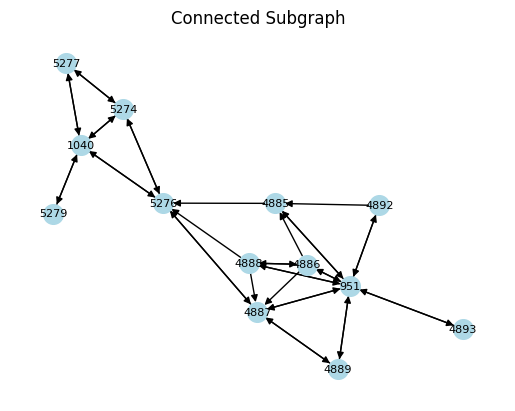

In [8]:
strong_components = list(nx.strongly_connected_components(graphX))
# Select the first strongly connected component with more than one node
selected_component = [comp for comp in strong_components if len(comp) > 10][0]
# Create a subgraph using the selected component
subgraph = graphX.subgraph(selected_component)
fig, ax = plt.subplots()
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=8, ax=ax)
plt.title("Connected Subgraph")
plt.show()

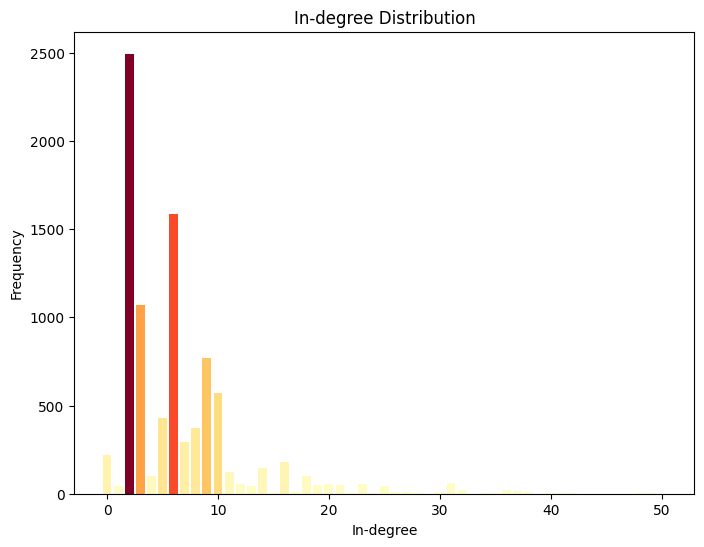

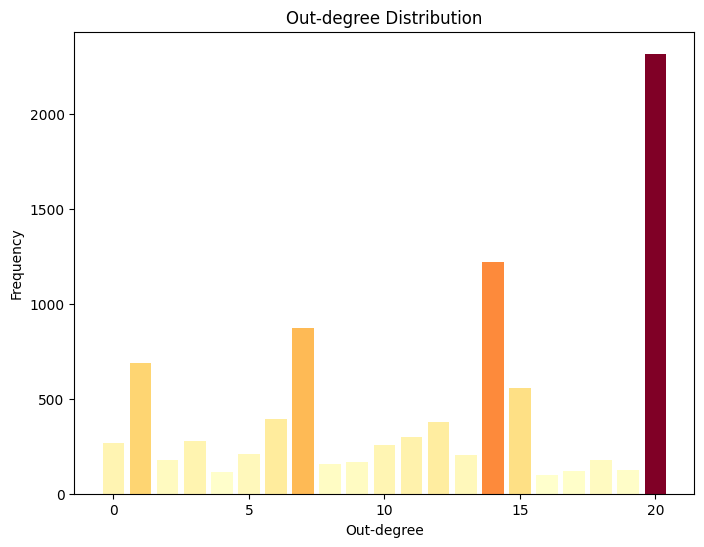

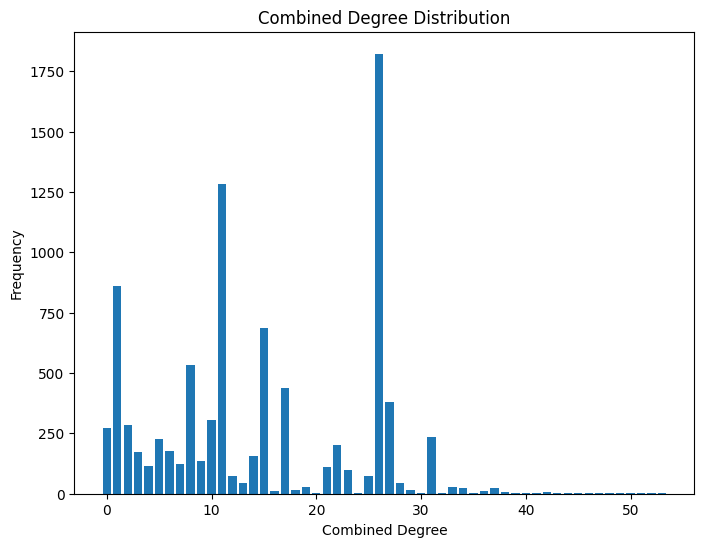

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Calculate the in-degree and out-degree of each node in the graph
in_degrees = dict(graphX.in_degree())
out_degrees = dict(graphX.out_degree())

# Calculate the in-degree distribution
in_degree_distribution = list(Counter(in_degrees.values()).values())

# Calculate the out-degree distribution
out_degree_distribution = list(Counter(out_degrees.values()).values())

# Define a colormap with warm colors
cmap = plt.get_cmap("YlOrRd")

# Normalize the values to range between 0 and 1
norm_in = plt.Normalize(min(in_degree_distribution), max(in_degree_distribution))
norm_out = plt.Normalize(min(out_degree_distribution), max(out_degree_distribution))

# Create a list of colors based on the normalized values for in-degree and out-degree
colors_in = [cmap(norm_in(value)) for value in in_degree_distribution]
colors_out = [cmap(norm_out(value)) for value in out_degree_distribution]

# Plot in-degree distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(in_degree_distribution)), in_degree_distribution, color=colors_in)
plt.xlabel("In-degree")
plt.ylabel("Frequency")
plt.title("In-degree Distribution")
plt.show()

# Plot out-degree distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(out_degree_distribution)), out_degree_distribution, color=colors_out)
plt.xlabel("Out-degree")
plt.ylabel("Frequency")
plt.title("Out-degree Distribution")
plt.show()


undirected_graph = graphX.to_undirected()

# Calculate the combined degree (in-degree + out-degree) of each node in the graph
combined_degrees = dict(undirected_graph.degree())

# Calculate the undirected degree distribution
undirected_degree_distribution = list(Counter(combined_degrees.values()).values())

# Plot combined degree distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(undirected_degree_distribution)), undirected_degree_distribution)
plt.xlabel("Combined Degree")
plt.ylabel("Frequency")
plt.title("Combined Degree Distribution")
plt.show()


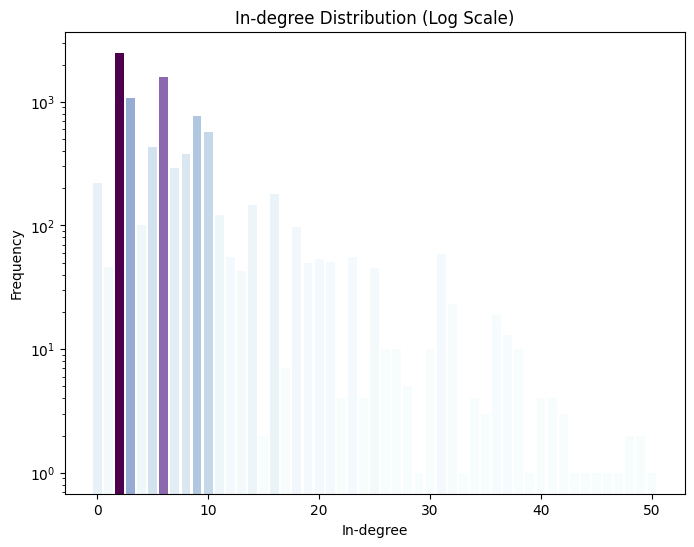

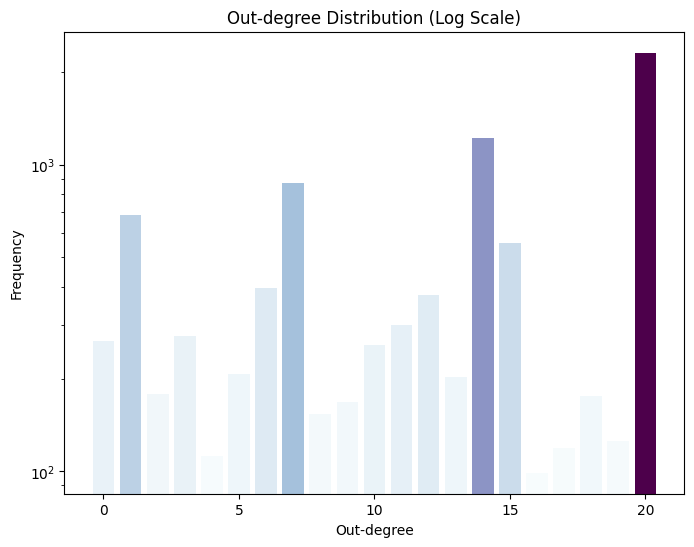

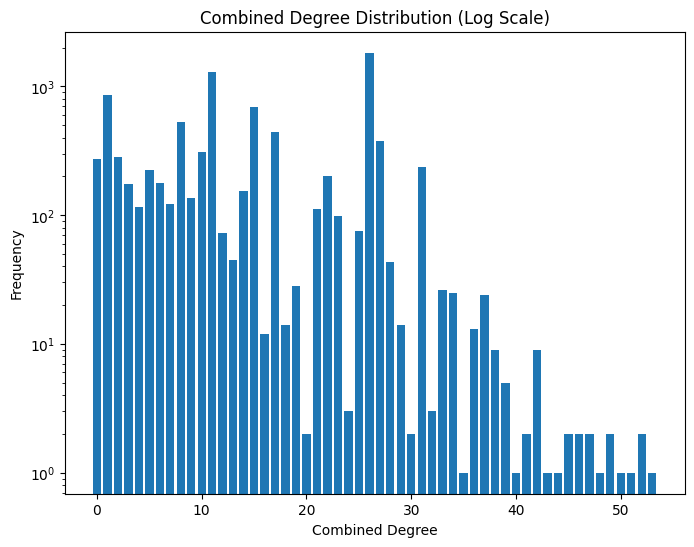

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Calculate the in-degree and out-degree of each node in the graph
in_degrees = dict(graphX.in_degree())
out_degrees = dict(graphX.out_degree())

# Calculate the in-degree distribution
in_degree_distribution = list(Counter(in_degrees.values()).values())

# Calculate the out-degree distribution
out_degree_distribution = list(Counter(out_degrees.values()).values())

# Define a colormap with warm colors
cmap = plt.get_cmap("BuPu")

# Normalize the values to range between 0 and 1
norm_in = plt.Normalize(min(in_degree_distribution), max(in_degree_distribution))
norm_out = plt.Normalize(min(out_degree_distribution), max(out_degree_distribution))

# Create a list of colors based on the normalized values for in-degree and out-degree
colors_in = [cmap(norm_in(value)) for value in in_degree_distribution]
colors_out = [cmap(norm_out(value)) for value in out_degree_distribution]

# Plot in-degree distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(in_degree_distribution)), in_degree_distribution, color=colors_in)
plt.xlabel("In-degree")
plt.ylabel("Frequency")
plt.title("In-degree Distribution (Log Scale)")
plt.yscale('log')  # Convert y-axis to log scale
plt.show()

# Plot out-degree distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(out_degree_distribution)), out_degree_distribution, color=colors_out)
plt.xlabel("Out-degree")
plt.ylabel("Frequency")
plt.title("Out-degree Distribution (Log Scale)")
plt.yscale('log')  # Convert y-axis to log scale
plt.show()


undirected_graph = graphX.to_undirected()

# Calculate the combined degree (in-degree + out-degree) of each node in the graph
combined_degrees = dict(undirected_graph.degree())

# Calculate the undirected degree distribution
undirected_degree_distribution = list(Counter(combined_degrees.values()).values())

# Plot combined degree distribution
plt.figure(figsize=(8, 6))
plt.bar(range(len(undirected_degree_distribution)), undirected_degree_distribution)
plt.xlabel("Combined Degree")
plt.ylabel("Frequency")
plt.title("Combined Degree Distribution (Log Scale)")
plt.yscale('log')  # Convert y-axis to log scale
plt.show()


In [10]:
lengths = []

# Compute all-pairs shortest paths
all_shortest_paths = nx.all_pairs_shortest_path(graphX)

# Iterate over the shortest paths
for source, shortest_paths in all_shortest_paths:
    for target, path in shortest_paths.items():
        path_length = len(path)
        lengths.append(path_length)
counter = Counter(lengths)

C:\Users\ANDRE\AppData\Local\Temp\ipykernel_2072\881317986.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


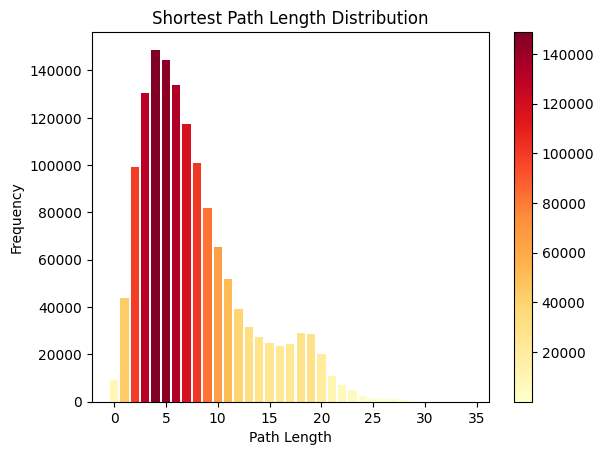

In [11]:
values = list(counter.values())

cmap = plt.get_cmap("YlOrRd")
norm = plt.Normalize(min(values), max(values))
colors = [cmap(norm(value)) for value in values]
plt.bar(range(len(values)), values, color=colors)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  
plt.colorbar(sm)
plt.xlabel("Path Length")
plt.ylabel("Frequency")
plt.title("Shortest Path Length Distribution")
plt.show()

In [12]:
# degree centrality
degree_centrality = nx.degree_centrality(graphX)

# betweenness centrality
betweenness_centrality = nx.betweenness_centrality(graphX)

# closeness centrality
closeness_centrality = nx.closeness_centrality(graphX)

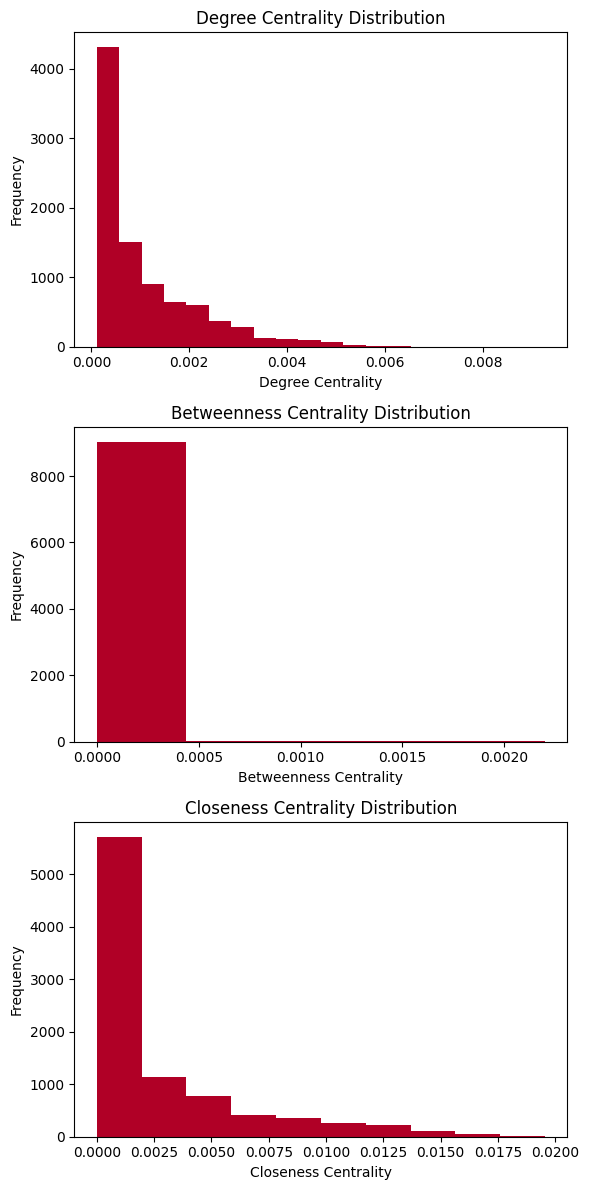

In [115]:

# Define a colormap with warm colors
cmap = plt.get_cmap("YlOrRd")

# Create subplots in a 3x1 grid
fig, axes = plt.subplots(3, 1, figsize=(6, 12))

# Plot histogram for degree centrality
degree_values = list(degree_centrality.values())
axes[0].hist(degree_values, bins=20, color=cmap(0.9))
axes[0].set_xlabel("Degree Centrality")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Degree Centrality Distribution")

# Plot histogram for betweenness centrality
betweenness_values = list(betweenness_centrality.values())
axes[1].hist(betweenness_values, bins=5, color=cmap(0.9))
axes[1].set_xlabel("Betweenness Centrality")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Betweenness Centrality Distribution")

# Plot histogram for closeness centrality
closeness_values = list(closeness_centrality.values())
axes[2].hist(closeness_values, bins=10, color=cmap(0.9))
axes[2].set_xlabel("Closeness Centrality")
axes[2].set_ylabel("Frequency")
axes[2].set_title("Closeness Centrality Distribution")

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

# Link prediction

In [17]:
graph

Data(x=[9064, 7], edge_index=[2, 43963])

In [134]:
graph.x.size()

torch.Size([9064, 7])

In [139]:
degree_centrality_feats = torch.tensor((list(degree_centrality.values()))).unsqueeze(1)
betweenness_centrality_feats = torch.tensor((list(betweenness_centrality.values()))).unsqueeze(1)
closeness_centrality_feats = torch.tensor((list(closeness_centrality.values()))).unsqueeze(1)
pagerank_feats = torch.tensor(list(nx.pagerank(graphX).values())).unsqueeze(1)
eigenvector_centrality_feats = torch.tensor((list(nx.eigenvector_centrality(graphX).values()))).unsqueeze(1)
in_degree_feats = torch.tensor(list(dict(graphX.in_degree()).values())).unsqueeze(1)
out_degree_feats = torch.tensor(list(dict(graphX.out_degree()).values())).unsqueeze(1)
average_neighbor_degree_feats = torch.tensor(list(nx.average_neighbor_degree(graphX).values())).unsqueeze(1)

In [180]:
new_features_x = torch.cat((graph.x,
                            degree_centrality_feats,
                            betweenness_centrality_feats,
                            closeness_centrality_feats,
                            pagerank_feats,
                            eigenvector_centrality_feats,
                            in_degree_feats,
                            out_degree_feats,
                            average_neighbor_degree_feats
                           ), dim=1)

In [181]:
new_features_x.size()

torch.Size([9064, 15])

In [184]:
graph.x=new_features_x

In [185]:
graph

Data(x=[9064, 15], edge_index=[2, 43963])

In [186]:
torch.save(graph, 'ENHANCEDgraph.pt')

Number of node features: 15


C:\Users\ANDRE\Anaconda3\envs\GNNs\lib\site-packages\torch_geometric\deprecation.py:22: UserWarning: 'train_test_split_edges' is deprecated, use 'transforms.RandomLinkSplit' instead
  warnings.warn(out)


Training set size : 80204 edges
Validation set size : 2358 edges
Test set size : 4716 edges

GAE(
  (linear1): Linear(in_features=15, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=256, bias=True)
  (linear3): Linear(in_features=256, out_features=1024, bias=True)
  (conv): GCN(1024, 256, num_layers=2)
  (linear4): Linear(in_features=256, out_features=64, bias=True)
  (tanh): Tanh()
  (relu): ReLU()
)
The model has 953408 trainable parameters

Batch/Epoch/Step: 100, Train Loss: 0.4660, Val f1: 0.7772
Batch/Epoch/Step: 200, Train Loss: 0.4356, Val f1: 0.7797
Batch/Epoch/Step: 300, Train Loss: 0.4240, Val f1: 0.7853
Batch/Epoch/Step: 400, Train Loss: 0.4164, Val f1: 0.7766
Batch/Epoch/Step: 500, Train Loss: 0.4145, Val f1: 0.7842
Batch/Epoch/Step: 600, Train Loss: 0.4065, Val f1: 0.7789
Batch/Epoch/Step: 700, Train Loss: 0.4210, Val f1: 0.7858
Batch/Epoch/Step: 800, Train Loss: 0.3985, Val f1: 0.7904
Batch/Epoch/Step: 900, Train Loss: 0.3947, Val f1: 0.7868


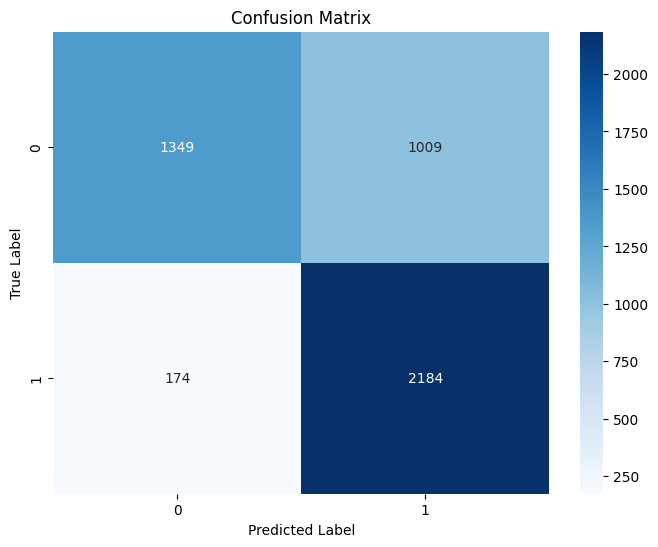

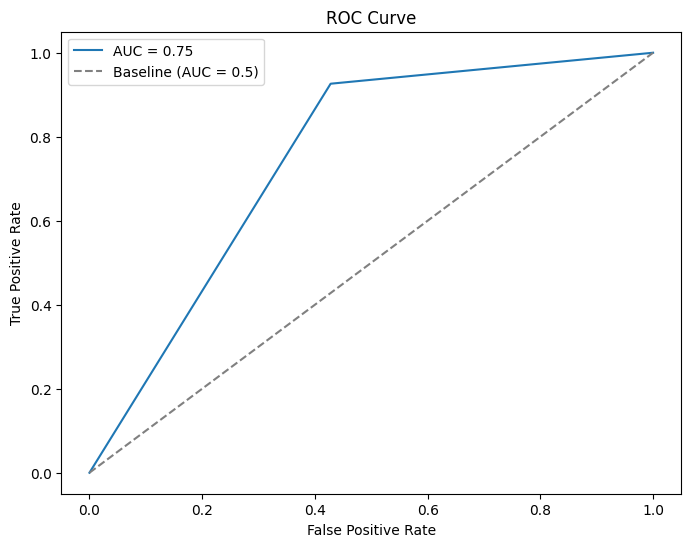

Final Test performance 

Precision : 0.6839962417788913
Recall : 0.926208651399491
F1 score : 0.7868852459016393
ROC AUC Score : 0.7491518235793044


In [33]:
%run GNN.py --graph enhanced --gnn gcn

Number of node features: 15


C:\Users\ANDRE\Anaconda3\envs\GNNs\lib\site-packages\torch_geometric\deprecation.py:22: UserWarning: 'train_test_split_edges' is deprecated, use 'transforms.RandomLinkSplit' instead
  warnings.warn(out)


Training set size : 80204 edges
Validation set size : 2358 edges
Test set size : 4716 edges

GAE(
  (linear1): Linear(in_features=15, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=256, bias=True)
  (linear3): Linear(in_features=256, out_features=1024, bias=True)
  (conv): GAT(1024, 256, num_layers=2)
  (linear4): Linear(in_features=256, out_features=64, bias=True)
  (tanh): Tanh()
  (relu): ReLU()
)
The model has 954944 trainable parameters

Batch/Epoch/Step: 100, Train Loss: 0.4876, Val f1: 0.7802
Batch/Epoch/Step: 200, Train Loss: 0.4474, Val f1: 0.7742
Batch/Epoch/Step: 300, Train Loss: 0.4316, Val f1: 0.7723
Batch/Epoch/Step: 400, Train Loss: 0.4233, Val f1: 0.7781
Batch/Epoch/Step: 500, Train Loss: 0.4150, Val f1: 0.7821
Batch/Epoch/Step: 600, Train Loss: 0.4146, Val f1: 0.7716
Batch/Epoch/Step: 700, Train Loss: 0.4034, Val f1: 0.7782
Batch/Epoch/Step: 800, Train Loss: 0.4009, Val f1: 0.7735
Batch/Epoch/Step: 900, Train Loss: 0.3987, Val f1: 0.7720


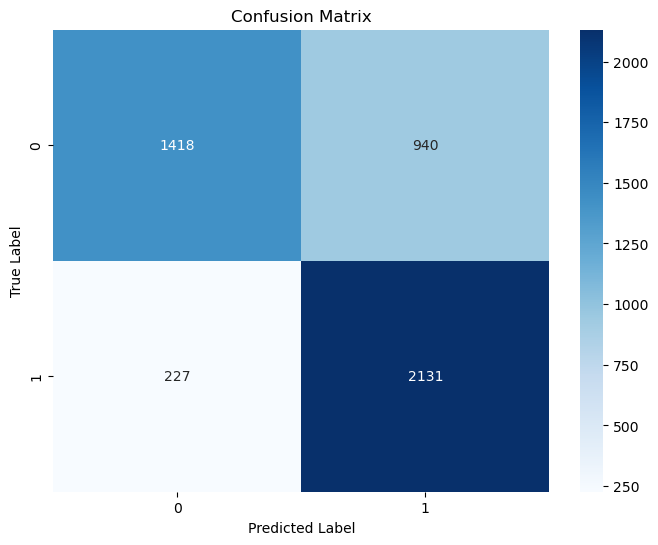

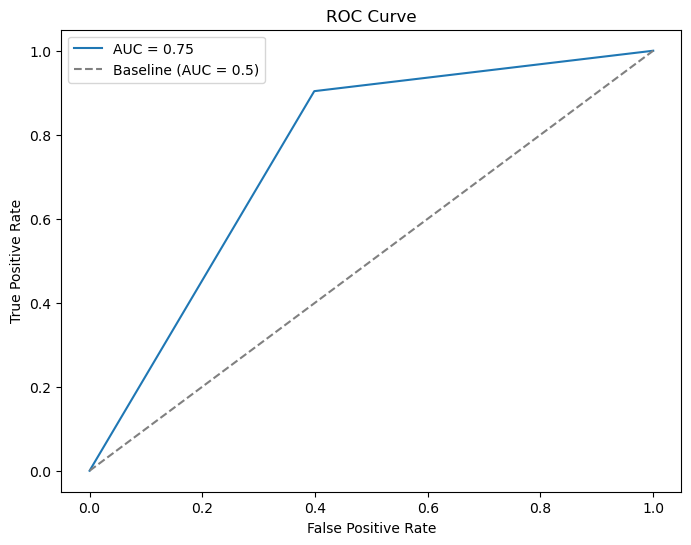

Final Test performance 

Precision : 0.6939107782481276
Recall : 0.9037319762510602
F1 score : 0.785043286056364
ROC AUC Score : 0.7525445292620865


In [2]:
%run GNN.py --graph enhanced --gnn gat

Number of node features: 15
Training set size : 80204 edges
Validation set size : 2358 edges
Test set size : 4716 edges

GAE(
  (linear1): Linear(in_features=15, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=256, bias=True)
  (linear3): Linear(in_features=256, out_features=1024, bias=True)
  (conv): GraphSAGE(1024, 256, num_layers=2)
  (linear4): Linear(in_features=256, out_features=64, bias=True)
  (tanh): Tanh()
  (relu): ReLU()
)
The model has 1608768 trainable parameters

Batch/Epoch/Step: 100, Train Loss: 0.4647, Val f1: 0.7584
Batch/Epoch/Step: 200, Train Loss: 0.4456, Val f1: 0.7607
Batch/Epoch/Step: 300, Train Loss: 0.4243, Val f1: 0.7581
Batch/Epoch/Step: 400, Train Loss: 0.4181, Val f1: 0.7624
Batch/Epoch/Step: 500, Train Loss: 0.4101, Val f1: 0.7608
Batch/Epoch/Step: 600, Train Loss: 0.4160, Val f1: 0.7656
Batch/Epoch/Step: 700, Train Loss: 0.4022, Val f1: 0.7648
Batch/Epoch/Step: 800, Train Loss: 0.4102, Val f1: 0.7703
Batch/Epoch/Step: 900, T

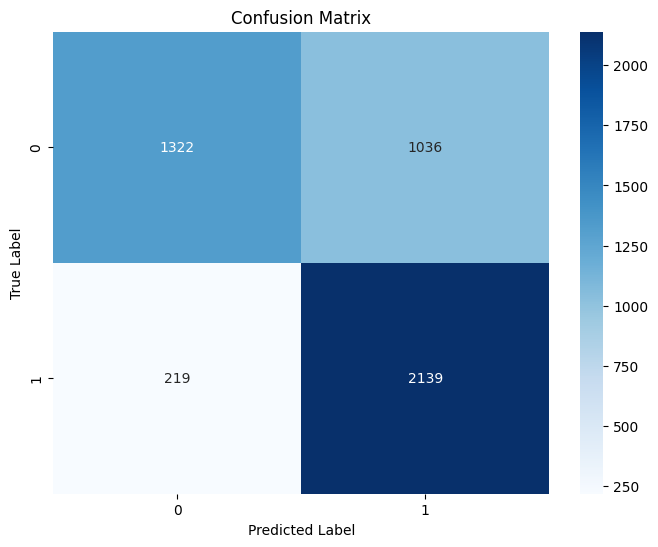

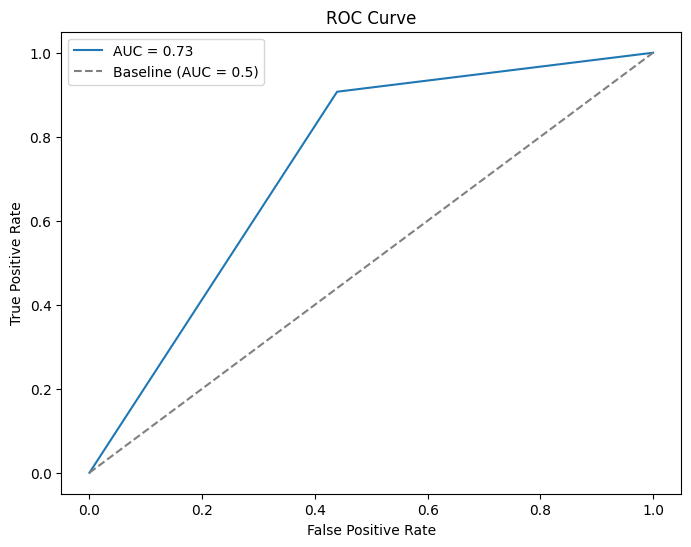

Final Test performance 

Precision : 0.6737007874015748
Recall : 0.9071246819338422
F1 score : 0.7731791071751309
ROC AUC Score : 0.7338846480067853


In [35]:
%run GNN.py --graph enhanced --gnn sage